In [4]:
from pathlib import Path
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import pandas as pd 



In [262]:
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#marker_sequence =  ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

blue = '#4400FF'
yellow = '#FFD500'
purple = '#e377c2'
red = '#d62728'

# color_sequence = [blue, '#ff7f0e', '#2ca02c', red]
# color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c', red, '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

marker_sequence =  (('o',1.0), ('v',1.0), ('+',4.0), ('+',4.0))


sta_color = blue
dyn_color = yellow
bare_color = red


In [265]:
def load(bench,kind,time):
    return pd.read_csv("../"+bench+"/results/"+kind+time, skiprows=1) 

bare_ev      = load('bare_pingpong', 'ev_bare', "-2019-10-21-21:48-10s.txt")
bare_ev_cps  = load('bare_pingpong', 'ev_bare_cps', "-2019-10-21-21:48-10s.txt")
bare_lwt     = load('bare_pingpong', 'lwt_bare_nowrapper', "-2019-10-21-21:48-10s.txt")
bare_lwt_cps = load('bare_pingpong', 'lwt_bare_cps', "-2019-10-21-21:48-10s.txt")

lwt_dyn     = load('pingpong', 'lwt_dynamic', '-2019-10-22-23:07-10s.txt')
lwt_sta     = load('pingpong', 'lwt_static', '-2019-10-22-23:07-10s.txt')
ev_dyn     = load('pingpong', 'ev_dynamic', '-2019-10-22-23:07-10s.txt')
ev_sta     = load('pingpong', 'ev_static', '-2019-10-22-23:07-10s.txt')
lwt_dyn_nochk     = load('pingpong', 'lwt_dynamic_nocheck', '-2019-10-22-23:07-10s.txt')
lwt_dyn_fresh     = load('pingpong', 'lwt_dynamic_freshnanomutex', '-2019-10-22-23:07-10s.txt')

size=str(20)
lwt_dyn_n     = load('nping', 'lwt_dynamic_'+size, '-2019-10-21-22:02-10s.txt')
lwt_sta_n     = load('nping', 'lwt_static_untyped_'+size, '-2019-10-21-22:02-10s.txt')
#lwt_sta_n     = load('nping', 'lwt_static_'+size, '-2019-10-21-22:02-10s.txt')
ev_dyn_n     = load('nping', 'ev_dynamic_'+size, '-2019-10-21-22:02-10s.txt')
ev_sta_n     = load('nping', 'ev_static_'+size, '-2019-10-21-22:02-10s.txt')
lwt_dyn_n_nochk     = load('nping', 'lwt_dynamic_nocheck_'+size, '-2019-10-21-22:02-10s.txt')
lwt_dyn_n_fresh     = load('nping', 'lwt_dynamic_fresh_'+size, '-2019-10-21-22:02-10s.txt')
lwt_dyn_n_danger     = load('nping', 'lwt_dynamic_nocheck_untyped_'+size, '-2019-10-21-22:02-10s.txt')


No handles with labels found to put in legend.


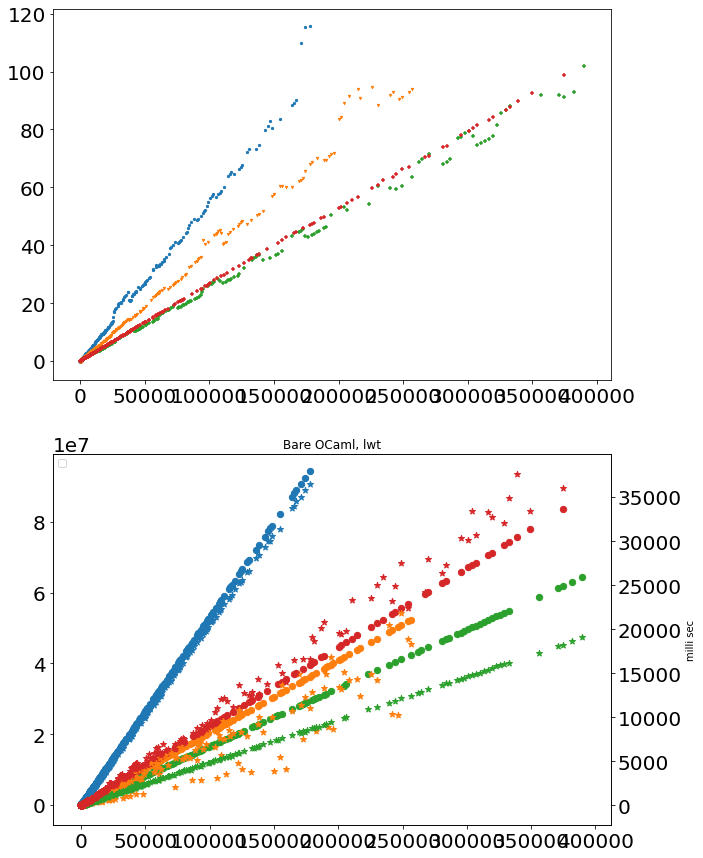

No handles with labels found to put in legend.


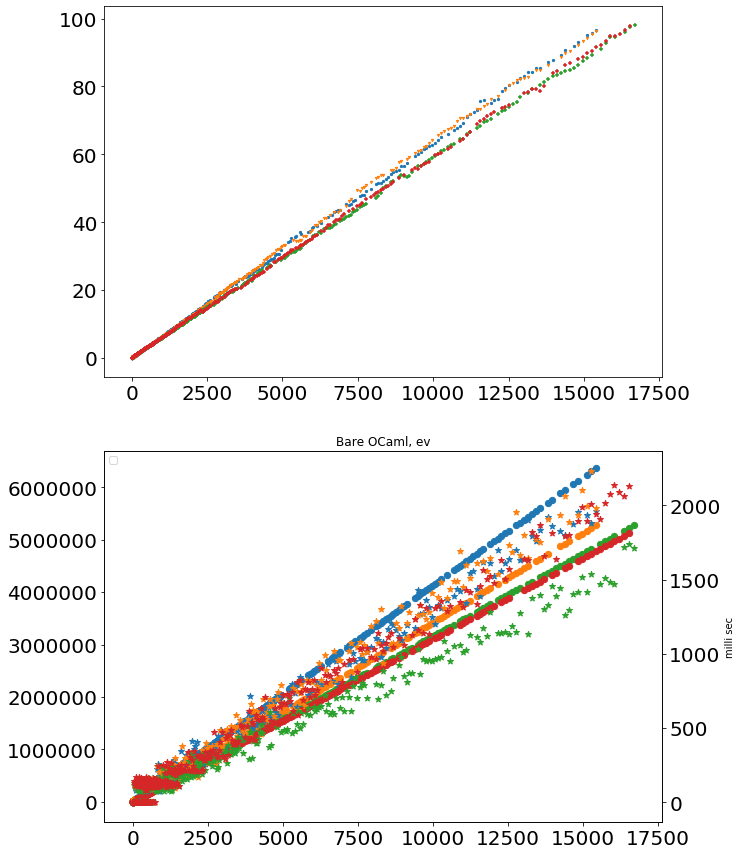

In [269]:

def scatter(ax1,ax2,ax3,data,idx,label,shift):
    #data = data[data['runs']<1000]
    #data = data[data['cycles']>low]
    #data = data[data['cycles']<high]
    #data = data.sample(100)
    marker,size = marker_sequence[idx]
    size = size * 5
    #data = 
    if data.shape[0]>500:
        data = data.sample(n=500)
    ax1.scatter(data['runs'], data['nanos']/1000000, size, color_sequence[idx+shift], label=label, marker=marker)
    #data = data[data['minor_allocated']>0]
    ax2.scatter(data['runs'], data['minor_allocated'], 40, color_sequence[idx+shift], marker="o")
    ax3.scatter(data['runs'], data['promoted'], 40, color_sequence[idx+shift], marker="*")

def show_graph(title, dfs, shift=0):
    # plt.figure(figsize=(20,10))
    fig, (ax1,ax2) = plt.subplots(2,1)
    fig.set_figheight(15)
    fig.set_figwidth(10)
    ax3 = ax2.twinx()
    for i in range(0,len(dfs)):
        scatter(ax1, ax2, ax3, dfs[i][1], i, dfs[i][0], shift)

    plt.xlabel("Ping loop count")
    plt.ylabel("milli sec")
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()


show_graph('Bare OCaml, lwt', 
           [('Static',lwt_sta), 
            ('Dynamic',lwt_dyn),
            ('lwt (ChVec)',bare_lwt), 
            ('lwt (CPS)',bare_lwt_cps)])


show_graph('Bare OCaml, ev', 
           [('Static',ev_sta), 
            ('Dynamic',ev_dyn),
            ('lwt (ChVec)',bare_ev), 
            ('lwt (CPS)',bare_ev_cps)])

def prev():
    show_graph('Bare OCaml, ev', [('ev (ChVec)',bare_ev), ('ev (CPS)',bare_ev_cps)], 2)
    show_graph('Bare OCaml, lwt', [('lwt (ChVec)',bare_lwt), ('lwt (CPS)',bare_lwt_cps)], 2)

    show_graph('MPST-OCaml and bare (ev)', [('Static',ev_sta), ('Dynamic',ev_dyn), ('Bare', bare_ev)])
    show_graph('NPing('+size+') and bare (ev)', [('Static',ev_sta_n), ('Dynamic',ev_dyn_n), ('Bare', bare_ev)])


    show_graph('MPST-OCaml and bare (lwt)', 
               [('Static',lwt_sta), ('Dynamic',lwt_dyn), ('Bare', bare_lwt)])

    show_graph('MPST-OCaml and bare (lwt)', 
               [('Static',lwt_sta), ('Dynamic',lwt_dyn), ('Bare', bare_lwt),
                ('DynFresh', lwt_dyn_fresh)])

    show_graph('MPST-OCaml and bare (lwt)', 
               [('Static',lwt_sta), ('Dynamic',lwt_dyn), ('Bare', bare_lwt),
                ('DynNoChk', lwt_dyn_nochk)])

    show_graph('NPing('+size+') and bare (lwt)', 
               [('Static',lwt_sta_n), ('Dynamic',lwt_dyn_n), ('Bare', bare_lwt),                                   
                ('DynFresh', lwt_dyn_n_fresh)])

    show_graph('NPing('+size+') and bare (lwt)', 
               [('Static',lwt_sta_n), ('Dynamic',lwt_dyn_n), ('Bare', bare_lwt),                                   
                ('DynNoChk', lwt_dyn_n_nochk)])

    show_graph('NPing('+size+') and bare (lwt)', 
               [('Static',lwt_sta_n), ('Dynamic',lwt_dyn_n), ('Bare', bare_lwt),                                   
                ('DynUntyped', lwt_dyn_n_danger)])






In [190]:
lwt_dyn

,runs,cycles,nanos,compactions,minor_allocated,major_allocated,promoted,major_collections,minor_collections
0,0,49,5483,0,29,23,23,0,1
1,1,46860,11444,0,249,0,0,0,0
2,2,5395,1192,0,435,0,0,0,0
3,3,5562,1430,0,639,0,0,0,0
4,4,7299,1430,0,843,0,0,0,0
5,5,8710,2145,0,1047,0,0,0,0
6,6,10022,2145,0,1251,0,0,0,0
7,7,11465,2861,0,1455,0,0,0,0
8,8,13487,3099,0,1659,0,0,0,0
9,9,15720,3814,0,1863,0,0,0,0
